In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dp = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
dp = pathlib.Path(dp)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
dp

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
import pathlib
dp = pathlib.Path(dp)
dp

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
list(dp.glob('*/*.jpg'))[:5]

[PosixPath('/root/.keras/datasets/flower_photos/dandelion/3580443099_9a6902ebd8_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/4696437766_85952d0196.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/477316928_a70a31a704_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/5654859907_c2be3b0f1e_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/14019781123_ea0f8722d4_n.jpg')]

In [ ]:
image_count = len(list(dp.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(dp.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/8241471746_5d81fdd3c0_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/7285188160_49d84b95a3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3264570182_c7ded528ba_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg')]

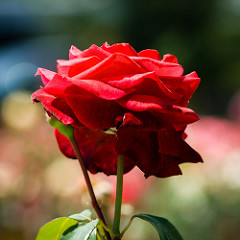

In [ ]:
PIL.Image.open(str(roses[1]))

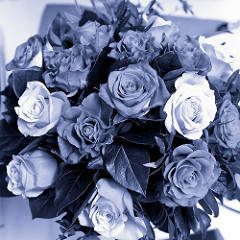

In [ ]:
PIL.Image.open(str(roses[2]))

In [ ]:
flowers_images_dict = {
    'roses': list(dp.glob('roses/*')),
    'daisy': list(dp.glob('daisy/*')),
    'dandelion': list(dp.glob('dandelion/*')),
    'sunflowers': list(dp.glob('sunflowers/*')),
    'tulips': list(dp.glob('tulips/*')),}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/8241471746_5d81fdd3c0_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/7285188160_49d84b95a3_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3264570182_c7ded528ba_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'/root/.keras/datasets/flower_photos/roses/8241471746_5d81fdd3c0_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dp,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dp,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


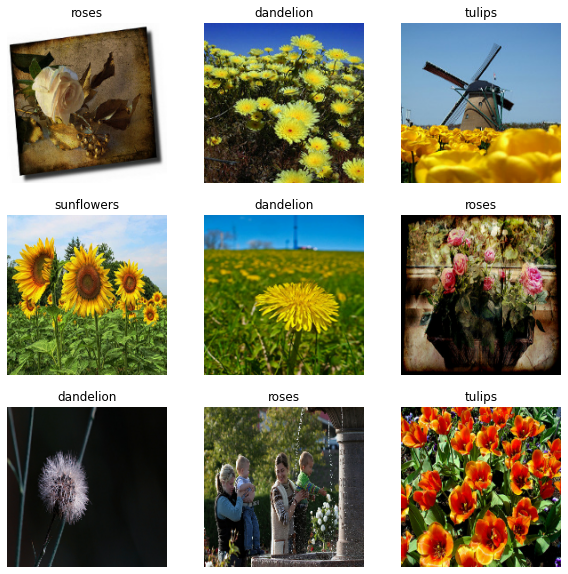

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 92s 982ms/step - loss: 1.3531 - accuracy: 0.4040 - val_loss: 1.1357 - val_accuracy: 0.5218
Epoch 2/10
92/92 [==============================] - 91s 990ms/step - loss: 1.0458 - accuracy: 0.5824 - val_loss: 1.0549 - val_accuracy: 0.5708
Epoch 3/10
92/92 [==============================] - 92s 991ms/step - loss: 0.8899 - accuracy: 0.6591 - val_loss: 0.9301 - val_accuracy: 0.6322
Epoch 4/10
92/92 [==============================] - 91s 987ms/step - loss: 0.6776 - accuracy: 0.7463 - val_loss: 0.9760 - val_accuracy: 0.6376
Epoch 5/10
92/92 [==============================] - 90s 976ms/step - loss: 0.4316 - accuracy: 0.8403 - val_loss: 1.1051 - val_accuracy: 0.6281
Epoch 6/10
92/92 [==============================] - 94s 1s/step - loss: 0.2527 - accuracy: 0.9193 - val_loss: 1.5684 - val_accuracy: 0.5995
Epoch 7/10
92/92 [==============================] - 91s 983ms/step - loss: 0.1373 - accuracy: 0.9601 - val_loss: 1.4717 - val_accuracy: 0.6185
Epoch 8/10
92

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_3d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 27.8 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 272 kB 52.3 MB/s 
     |████████████████████████████████| 212 kB 51.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.1 MB/s 
     |████████████████████████████████| 2.3 MB 54.5 MB/s 
     |████████████████████████████████| 140 kB 61.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 144 kB 52.2 MB/s 
     |████████████████████████████████| 271 kB 64.6 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 62 kB

In [ ]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://55261.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
